https://stackabuse.com/python-for-nlp-multi-label-text-classification-with-keras/

# Pre-Process

In [ ]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/train_text_emoji_clean.csv")
test = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/test_text_emoji_clean.csv")
valid = pd.read_csv(r"https://raw.githubusercontent.com/RussellDash332/CS3244-Twemoji/main/Datasets/valid_text_emoji_clean.csv")

In [ ]:
def to_columns(labels):
    labels = labels[1:-1].split(", ")
    labels = [int(label) for label in labels]
    if i in labels:
        return 1
    else:
        return 0

In [ ]:
for i in range(12):
    train[i] = train['labels'].apply(to_columns)
    test[i] = test['labels'].apply(to_columns)
    valid[i] = valid['labels'].apply(to_columns)

In [ ]:
train = train.drop("labels", axis = 1)
test = test.drop("labels", axis = 1)
valid = valid.drop("labels", axis = 1)

In [ ]:
train

annotations                                             tweets  ...  10  11
0               😂                         school is so dead o my god  ...   0   0
1               😂  lol I've been told mine is worse than yours bu...  ...   0   0
2               😂  I'm excited to hear them..... That shit is goi...  ...   0   0
3               😂  Damn alycia knows everything even indirect tweets  ...   0   0
4               😂             x_juicebox: That sound like everything  ...   0   0
...           ...                                                ...  ...  ..  ..
59900           🙃  FinesseYoAss: Or That Picture Was Just Cute To...  ...   0   1
59901           🙃                 I'm otw wit some gas still hate me  ...   0   1
59902           🙃                                Yeahhh you kinda do  ...   0   1
59903           🙃                     nothing wit youuuuu raymundooo  ...   0   1
59904           🙃  dont be that person who parks right next to me...  ...   0   1

[59905 rows x 14 columns]

# Model 1

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
preprocess_text("abc'  asew'ss'ss'' sd234321")

'abc asew ss ss sd '

In [ ]:
X_train = []
sentences = list(train["tweets"])
for sen in sentences:
    X_train.append(preprocess_text(sen))

train_labels = train[list(range(12))]
y_train = train_labels.values
print(X_train)
print(len(X_train))
print(y_train)
print(y_train.shape)

['school is so dead o my god', 'lol I ve been told mine is worse than yours but I don t believe that', 'I m excited to hear them That shit is going rattle your soul', 'Damn alycia knows everything even indirect tweets', 'x juicebox That sound like everything', 'Parents be having kids so they can be lazy when the kid gets old enough to clean', ' stars from hungry house an ankle tag from walsall police I never disappoint missy x', ' how yo chin longer than yo neck ', 'I m gonna wake up well rested and pissed', 'silly me always mixing things up I ll text you when I charge my phone ', 'I need to come off twitter dan', 'Im tired of talking to the same ass people', 'I read it as donuts FML ', 'kimboinx How there you', 'I Understand Na', 'steady We are agreeing on more than we disagree on these days', 'no it s truce inside joke', 'you real funny', 'RT that man is young murk rap ', 'we just goofy amp struggle A lot', 'shidddd', 'So sick of seeing love island news in with all the political news

In [ ]:
X_test = []
sentences = list(test["tweets"])
for sen in sentences:
    X_test.append(preprocess_text(sen))

test_labels = test[list(range(12))]
y_test = test_labels.values
print(X_test)
print(len(X_test))
print(y_test)
print(y_test.shape)

['The conversation is so deep i saw adele rolling', 'Saras OREO Lord we re coo asf lol Just waiting for break so we can chill', 'I can t', 'These little kids talking about going to Canada arent u like Whats the point', 'only would do that', 'Idk What you talking about', 'they gone put Williams back on the bench in a minute he better get it together', 'you gotta get on it to get anywhere Lol can t put it in your car', 'what s brackin ', 'gware If my tweets offend you I m sorry not really quit being a pussy and just unfollow me', 'tbf they was really loud I thought the music was coming from the CD too but it was the cruise', 'I watched that shit so many times', 'Thanks homie', ' LeBron is trash led all players in points rebounds assist blocks steals Yup trash', 'Girls gone wild', 'cool cool', 'my charger yaar', 'LMFAO if I ever take a nap with pants on they always end up off so I feel you', 'WHY COULD I NOT CHOOSE MORE THAN ONE ', 'apex syams Night Owl', 'thanks bbygirl im trying my best

In [ ]:
X_valid = []
sentences = list(valid["tweets"])
for sen in sentences:
    X_valid.append(preprocess_text(sen))

valid_labels = valid[list(range(12))]
y_valid = valid_labels.values
print(X_valid)
print(len(X_valid))
print(y_valid)
print(y_valid.shape)

['hahahah you guys crack me up', 'I m dead', 'ate girl The tweet was before TMC pa', 'Also who would ve thought that Will Griggs on fire would be the anthem of the euros Everyone s singing it', 'I m not fooling w you tonight', 'Oh ok', 'you now going to cvs', 'then come over siah wants to see you', ' ItsMIRA I ll Wait sips tea ', 'I mean I agree But if you tell someone who is obsessed with creepy dolls that you are creeped out by dolls ', 'yep that makes sense ', 'I know I m the same Dw my hairs fucked colour at the mo I ve got some dye I just cba', 'my mom just told me to pack my shit I didn t have time to even breathe', 'Who just texted Edward', 'Nah I m going with a big ass group of guys who will either protect me or scream like girls to make me laugh', 'Dumo was chugging two beers at once', 'says the man that claimed they was on their way for they money but never came we don t dodge round here', 'you trying to be on the next episode of First Take ', 'I swear I can be all depending 

In [ ]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove*.zip

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100)) #len of line in glove_file is 101
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
import tensorflow as tf

deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(12, activation='sigmoid')(LSTM_Layer_1)
model1 = Model(inputs=deep_inputs, outputs=dense_layer_1)

model1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), metrics=['acc'])

In [ ]:
print(model1.summary())

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 200)]             0         
_________________________________________________________________
embedding_15 (Embedding)     (None, 200, 100)          3416700   
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               117248    
_________________________________________________________________
dense_47 (Dense)             (None, 12)                1548      
Total params: 3,535,496
Trainable params: 118,796
Non-trainable params: 3,416,700
_________________________________________________________________
None


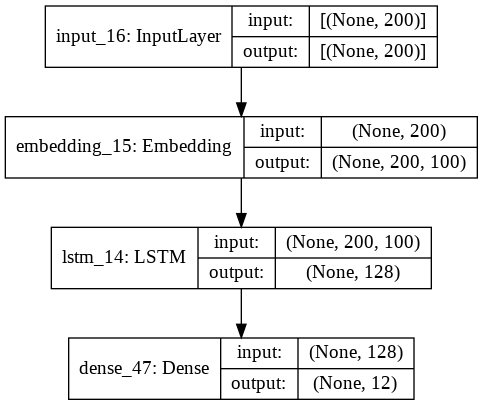

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model1, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=2, verbose=1, validation_split=0) #validation_split will take the last tweets

Epoch 1/2
469/469 [==============================] - 304s 644ms/step - loss: 0.3245 - acc: 0.1030
Epoch 2/2
469/469 [==============================] - 300s 641ms/step - loss: 0.3142 - acc: 0.1056


In [ ]:
score1 = model1.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score1[0])
print("Test Accuracy:", score1[1])
print(score1)
print(model1.metrics_names)

475/475 [==============================] - 31s 63ms/step - loss: 0.3131 - acc: 0.0588
Test Score: 0.3131330907344818
Test Accuracy: 0.05881190672516823
[0.3131330907344818, 0.05881190672516823]
['loss', 'acc']


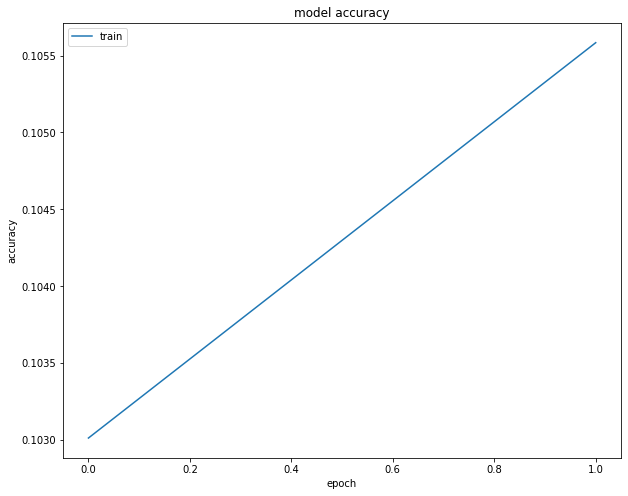

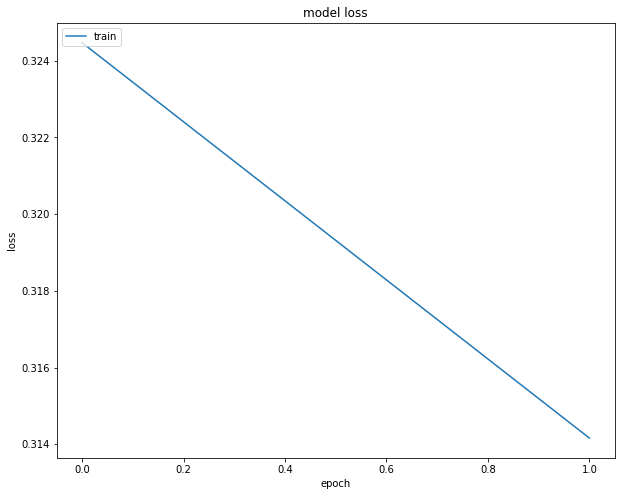

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
# plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
# plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
result1_train = model1.predict(x = X_test, verbose = 1)

475/475 [==============================] - 30s 62ms/step


In [ ]:
result1_train[10000]

array([0.09400332, 0.10835963, 0.09176597, 0.08172408, 0.1163888 ,
       0.09520268, 0.08172825, 0.0934957 , 0.08958319, 0.09048909,
       0.09019053, 0.08884084], dtype=float32)

# Model 2

In [ ]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
X_train = []
sentences = list(train["tweets"])
for sen in sentences:
    X_train.append(preprocess_text(sen))

y_train = train[list(range(12))]
print(X_train)
print(len(X_train))
print(y_train)
print(y_train.shape)

['school is so dead o my god', 'lol I ve been told mine is worse than yours but I don t believe that', 'I m excited to hear them That shit is going rattle your soul', 'Damn alycia knows everything even indirect tweets', 'x juicebox That sound like everything', 'Parents be having kids so they can be lazy when the kid gets old enough to clean', ' stars from hungry house an ankle tag from walsall police I never disappoint missy x', ' how yo chin longer than yo neck ', 'I m gonna wake up well rested and pissed', 'silly me always mixing things up I ll text you when I charge my phone ', 'I need to come off twitter dan', 'Im tired of talking to the same ass people', 'I read it as donuts FML ', 'kimboinx How there you', 'I Understand Na', 'steady We are agreeing on more than we disagree on these days', 'no it s truce inside joke', 'you real funny', 'RT that man is young murk rap ', 'we just goofy amp struggle A lot', 'shidddd', 'So sick of seeing love island news in with all the political news

In [ ]:
X_test = []
sentences = list(test["tweets"])
for sen in sentences:
    X_test.append(preprocess_text(sen))

y_test = test[list(range(12))]
print(X_test)
print(len(X_test))
print(y_test)
print(y_test.shape)

['The conversation is so deep i saw adele rolling', 'Saras OREO Lord we re coo asf lol Just waiting for break so we can chill', 'I can t', 'These little kids talking about going to Canada arent u like Whats the point', 'only would do that', 'Idk What you talking about', 'they gone put Williams back on the bench in a minute he better get it together', 'you gotta get on it to get anywhere Lol can t put it in your car', 'what s brackin ', 'gware If my tweets offend you I m sorry not really quit being a pussy and just unfollow me', 'tbf they was really loud I thought the music was coming from the CD too but it was the cruise', 'I watched that shit so many times', 'Thanks homie', ' LeBron is trash led all players in points rebounds assist blocks steals Yup trash', 'Girls gone wild', 'cool cool', 'my charger yaar', 'LMFAO if I ever take a nap with pants on they always end up off so I feel you', 'WHY COULD I NOT CHOOSE MORE THAN ONE ', 'apex syams Night Owl', 'thanks bbygirl im trying my best

In [ ]:
X_valid = []
sentences = list(valid["tweets"])
for sen in sentences:
    X_valid.append(preprocess_text(sen))

y_valid = valid[list(range(12))]
print(X_valid)
print(len(X_valid))
print(y_valid)
print(y_valid.shape)

['hahahah you guys crack me up', 'I m dead', 'ate girl The tweet was before TMC pa', 'Also who would ve thought that Will Griggs on fire would be the anthem of the euros Everyone s singing it', 'I m not fooling w you tonight', 'Oh ok', 'you now going to cvs', 'then come over siah wants to see you', ' ItsMIRA I ll Wait sips tea ', 'I mean I agree But if you tell someone who is obsessed with creepy dolls that you are creeped out by dolls ', 'yep that makes sense ', 'I know I m the same Dw my hairs fucked colour at the mo I ve got some dye I just cba', 'my mom just told me to pack my shit I didn t have time to even breathe', 'Who just texted Edward', 'Nah I m going with a big ass group of guys who will either protect me or scream like girls to make me laugh', 'Dumo was chugging two beers at once', 'says the man that claimed they was on their way for they money but never came we don t dodge round here', 'you trying to be on the next episode of First Take ', 'I swear I can be all depending 

In [ ]:
# First output
y0_train = y_train[[0]].values
y0_test =  y_test[[0]].values

# Second output
y1_train = y_train[[1]].values
y1_test =  y_test[[1]].values

# Third output
y2_train = y_train[[2]].values
y2_test =  y_test[[2]].values

# Fourth output
y3_train = y_train[[3]].values
y3_test =  y_test[[3]].values

# Fifth output
y4_train = y_train[[4]].values
y4_test =  y_test[[4]].values

# Sixth output
y5_train = y_train[[5]].values
y5_test =  y_test[[5]].values

y6_train = y_train[[6]].values
y6_test =  y_test[[6]].values

y7_train = y_train[[7]].values
y7_test =  y_test[[7]].values

y8_train = y_train[[8]].values
y8_test =  y_test[[8]].values

y9_train = y_train[[9]].values
y9_test =  y_test[[9]].values

y10_train = y_train[[10]].values
y10_test =  y_test[[10]].values

y11_train = y_train[[11]].values
y11_test =  y_test[[11]].values

In [ ]:
tokenizer = Tokenizer(num_words=100000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100)) #len of line in glove_file is 101
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer_1 = LSTM(128)(embedding_layer)

output0 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output1 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output2 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output3 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output4 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output5 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output6 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output7 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output8 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output9 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output10 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
output11 = Dense(1, activation='sigmoid')(LSTM_Layer_1)

model2 = Model(inputs=input_1, outputs=[output0, output1, output2, output3, output4, output5, output6, output7, output8, output9, output10, output11])

model2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0008), metrics=['acc'])

In [ ]:
print(model2.summary())

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_20 (InputLayer)           [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 200, 100)     3416700     input_20[0][0]                   
__________________________________________________________________________________________________
lstm_18 (LSTM)                  (None, 128)          117248      embedding_19[0][0]               
__________________________________________________________________________________________________
dense_84 (Dense)                (None, 1)            129         lstm_18[0][0]                    
___________________________________________________________________________________________

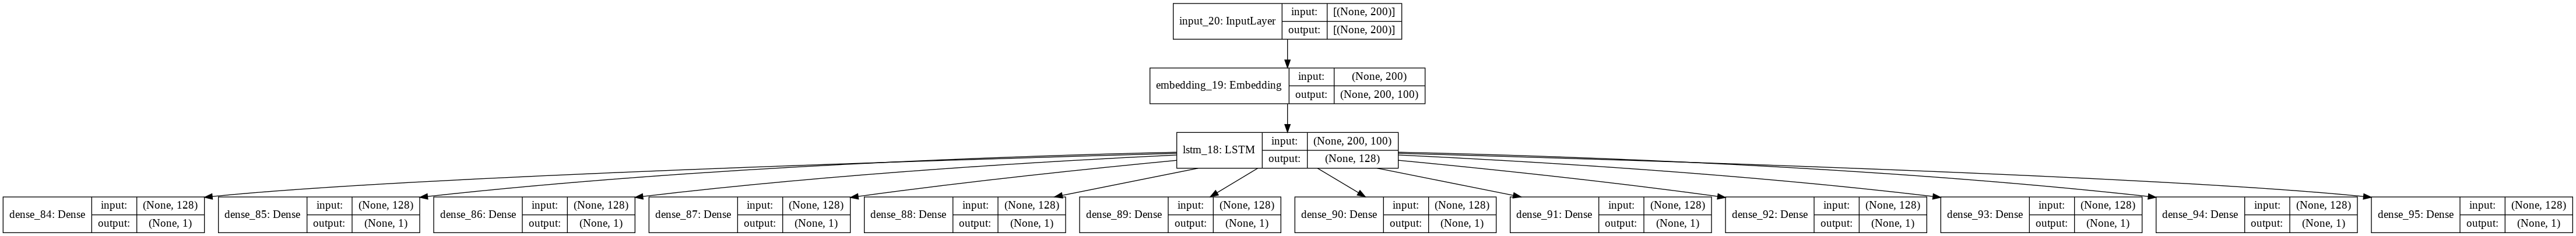

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model2, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)

In [ ]:
history2 = model2.fit(x=X_train, y=[y0_train, y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train, y10_train, y11_train], 
                    batch_size=128, epochs=2, verbose=1, validation_split=0) #validation_split will take the last tweets

Epoch 1/2
469/469 [==============================] - 307s 643ms/step - loss: 3.8788 - dense_84_loss: 0.3682 - dense_85_loss: 0.3296 - dense_86_loss: 0.3341 - dense_87_loss: 0.3173 - dense_88_loss: 0.3330 - dense_89_loss: 0.3151 - dense_90_loss: 0.3188 - dense_91_loss: 0.3111 - dense_92_loss: 0.3198 - dense_93_loss: 0.3173 - dense_94_loss: 0.3122 - dense_95_loss: 0.3023 - dense_84_acc: 0.8831 - dense_85_acc: 0.9021 - dense_86_acc: 0.9006 - dense_87_acc: 0.9081 - dense_88_acc: 0.9003 - dense_89_acc: 0.9092 - dense_90_acc: 0.9069 - dense_91_acc: 0.9112 - dense_92_acc: 0.9063 - dense_93_acc: 0.9078 - dense_94_acc: 0.9095 - dense_95_acc: 0.9143
Epoch 2/2
469/469 [==============================] - 301s 642ms/step - loss: 3.7712 - dense_84_loss: 0.3613 - dense_85_loss: 0.3210 - dense_86_loss: 0.3241 - dense_87_loss: 0.3074 - dense_88_loss: 0.3248 - dense_89_loss: 0.3048 - dense_90_loss: 0.3103 - dense_91_loss: 0.3012 - dense_92_loss: 0.3113 - dense_93_loss: 0.3080 - dense_94_loss: 0.3042 - de

In [ ]:
score2_train = model2.evaluate(x=X_train, y=[y0_train, y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, y7_train, y8_train, y9_train, y10_train, y11_train])
print(score2_train)
print(model2.metrics_names)

1873/1873 [==============================] - 124s 65ms/step - loss: 3.7683 - dense_84_loss: 0.3609 - dense_85_loss: 0.3206 - dense_86_loss: 0.3237 - dense_87_loss: 0.3072 - dense_88_loss: 0.3247 - dense_89_loss: 0.3058 - dense_90_loss: 0.3095 - dense_91_loss: 0.2999 - dense_92_loss: 0.3111 - dense_93_loss: 0.3078 - dense_94_loss: 0.3037 - dense_95_loss: 0.2936 - dense_84_acc: 0.8831 - dense_85_acc: 0.9021 - dense_86_acc: 0.9006 - dense_87_acc: 0.9081 - dense_88_acc: 0.9003 - dense_89_acc: 0.9092 - dense_90_acc: 0.9070 - dense_91_acc: 0.9112 - dense_92_acc: 0.9064 - dense_93_acc: 0.9078 - dense_94_acc: 0.9095 - dense_95_acc: 0.9144
[3.768303394317627, 0.360918253660202, 0.32055380940437317, 0.323661208152771, 0.3071637451648712, 0.32467731833457947, 0.30578941106796265, 0.30951714515686035, 0.29992541670799255, 0.31107833981513977, 0.30776914954185486, 0.30365052819252014, 0.2936040759086609, 0.883064866065979, 0.9020949602127075, 0.9006426930427551, 0.9080877900123596, 0.90032553672790

In [ ]:
score2 = model2.evaluate(x=X_test, y=[y0_test, y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test], verbose=1)

# print("Test Score:", score2[0])
# print("Test Accuracy:", score2[1])
print(score2)
print(model2.metrics_names)

475/475 [==============================] - 31s 65ms/step - loss: 3.7504 - dense_84_loss: 0.4613 - dense_85_loss: 0.4018 - dense_86_loss: 0.3189 - dense_87_loss: 0.3165 - dense_88_loss: 0.2617 - dense_89_loss: 0.2422 - dense_90_loss: 0.3415 - dense_91_loss: 0.3089 - dense_92_loss: 0.2146 - dense_93_loss: 0.4088 - dense_94_loss: 0.2296 - dense_95_loss: 0.2446 - dense_84_acc: 0.8350 - dense_85_acc: 0.8666 - dense_86_acc: 0.9028 - dense_87_acc: 0.9042 - dense_88_acc: 0.9278 - dense_89_acc: 0.9391 - dense_90_acc: 0.8928 - dense_91_acc: 0.9075 - dense_92_acc: 0.9503 - dense_93_acc: 0.8624 - dense_94_acc: 0.9410 - dense_95_acc: 0.9368
[3.7503979206085205, 0.4612596333026886, 0.4017764925956726, 0.31890979409217834, 0.3165256083011627, 0.2616768479347229, 0.24217912554740906, 0.34147772192955017, 0.30891427397727966, 0.21456213295459747, 0.40883490443229675, 0.22963295876979828, 0.2446441799402237, 0.8349578380584717, 0.8665700554847717, 0.9027923941612244, 0.9041754603385925, 0.92781877517700

In [ ]:
result = model2.predict(x = X_test, verbose = 1)

475/475 [==============================] - 30s 62ms/step


In [ ]:
s = []
for x in result[0]:
    for j in x:
        s+=[j]
set(s)

{0.5}

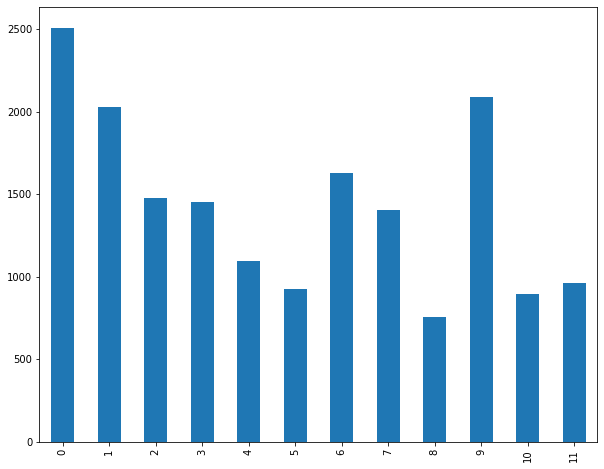

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

y_test.sum(axis=0).plot.bar()

In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['dense_16_acc'])
# # plt.plot(history.history['val_dense_11_acc'])

# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

# plt.plot(history.history['dense_16_loss'])
# # plt.plot(history.history['val_dense_11_loss'])

# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train','test'], loc='upper left')
# plt.show()

KeyError: ignored